<a href="https://colab.research.google.com/github/Patelzeelr/Boston-Housing-Data/blob/main/Ay6110_MODULE5_Lab2_Zeel_Patel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=f85fded714717cfa295938938e31fba3403c4b9d283c4c631e92276055e17c12
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
# STEP 1: Set up PySpark Session in Google Colab

# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Initialize Spark Session
spark = SparkSession.builder.appName("BostonHousing").getOrCreate()

In [3]:
# STEP 2: Read the Dataset

# Load dataset (make sure to upload the dataset to Colab)
from google.colab import files
uploaded = files.upload()

# Read the dataset into a PySpark DataFrame
housing_dataset = spark.read.csv("BostonHousing.csv", header=True, inferSchema=True)
housing_dataset.show(5)

Saving BostonHousing.csv to BostonHousing.csv
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [4]:
# STEP 3: Combine features to a single vector columns using VectorAssembler (all columns other than target column 'medv')
input_cols = housing_dataset.columns[:-1]  # Exclude the target column 'medv'
vec_assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
housing_dataset = vec_assembler.transform(housing_dataset)
housing_dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|            features|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
only showing top 5 rows



In [5]:
# STEP 4: Standardize the features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withMean=True, withStd=True)
scaler_model = scaler.fit(housing_dataset)
housing_dataset = scaler_model.transform(housing_dataset)
housing_dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|            features|      scaledFeatures|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|[-0.4193669292132...|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|[-0.4169266699640...|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|[-0.4169289951277...|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|[-0.4163384035610...|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|[-0.4120740534

In [7]:
# STEP 5: Train PCA model to reduce to 2 principal components
pca = PCA(k=2, inputCol="scaledFeatures", outputCol="pcaFeatures")
pca_model = pca.fit(housing_dataset)
housing_dataset = pca_model.transform(housing_dataset)
housing_dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+--------------------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|            features|      scaledFeatures|         pcaFeatures|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|[-0.4193669292132...|[2.09622303023858...|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|[-0.4169266699640...|[1.45581098944742...|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|[-0.4169289951277...|[2.07254655194818...|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|[-0.4163384035

In [8]:
import numpy as np
import pandas as pd

# Collect the 'pcaFeatures' and 'medv' columns as numpy arrays
pca_features = np.array(housing_dataset.select("pcaFeatures").rdd.flatMap(lambda x: x).collect())
medv = np.array(housing_dataset.select("medv").rdd.flatMap(lambda x: x).collect())

# Convert the numpy arrays to a pandas DataFrame
df_pandas = pd.DataFrame(pca_features, columns=["PC1", "PC2"])
df_pandas["medv"] = medv

# Show the first few rows of the pandas DataFrame
print(df_pandas.head())


        PC1       PC2  medv
0  2.096223  0.772348  24.0
1  1.455811  0.591400  21.6
2  2.072547  0.599047  34.7
3  2.608922 -0.006864  33.4
4  2.455755  0.097615  36.2


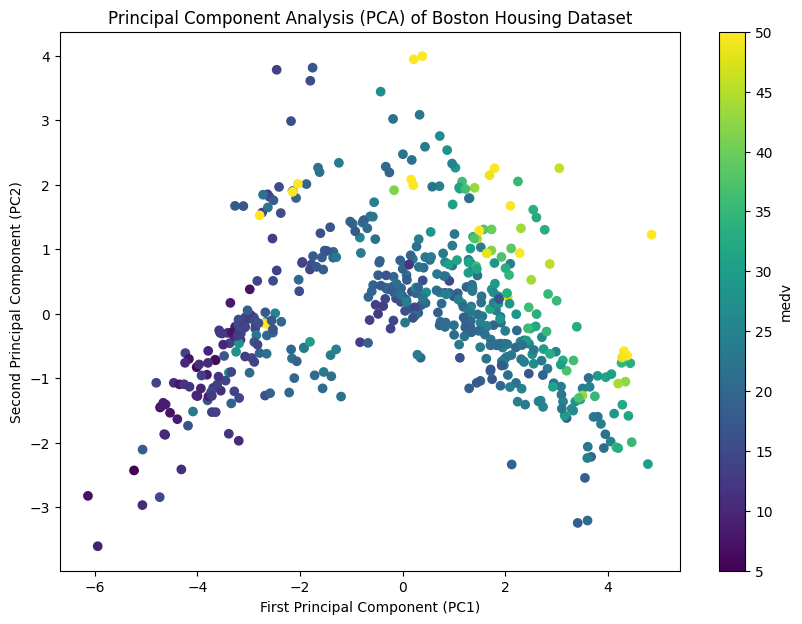

In [9]:
# STEP 7: Plot the two principal components
import matplotlib.pyplot as plt

# Create a scatter plot of the two principal components
plt.figure(figsize=(10, 7))
plt.scatter(df_pandas["PC1"], df_pandas["PC2"], c=df_pandas["medv"], cmap='viridis')
plt.colorbar(label='medv')
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('Principal Component Analysis (PCA) of Boston Housing Dataset')
plt.show()


In [10]:
# STEP 8: Vectorize features and target together for model development
from pyspark.ml.linalg import DenseVector

# Combine features and target into a single DataFrame
data = housing_dataset.select(housing_dataset['scaledFeatures'], housing_dataset['medv'])
data = data.rdd.map(lambda x: (DenseVector(x[0]), x[1])).toDF(['features', 'label'])
data.show(5)


+--------------------+-----+
|            features|label|
+--------------------+-----+
|[-0.4193669292132...| 24.0|
|[-0.4169266699640...| 21.6|
|[-0.4169289951277...| 34.7|
|[-0.4163384035610...| 33.4|
|[-0.4120740534296...| 36.2|
+--------------------+-----+
only showing top 5 rows



In [11]:
# STEP 9: Split dataset into training and testing dataset
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

In [12]:
# STEP 10: Fit model for linear regression
lr = LinearRegression(featuresCol='features', labelCol='label')
lr_model = lr.fit(train_data)


# STEP 11: Find out model coefficients and intercept
coefficients = lr_model.coefficients
intercept = lr_model.intercept
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")


Coefficients: [-0.977325078745046,1.1406822132685321,0.16324504123061745,0.7116333928728624,-2.133936592267314,2.4703173958890168,0.1467029188600288,-2.982492178640501,2.888780728502063,-2.2934351604834595,-2.0640900942975704,0.7853802659203177,-3.709806672002421]
Intercept: 22.596434879491607


In [13]:
# STEP 12: Evaluate model for test dataset
test_results = lr_model.evaluate(test_data)
print(f"RMSE: {test_results.rootMeanSquaredError}")
print(f"R2: {test_results.r2}")


RMSE: 4.671806485171367
R2: 0.7931522547835894


+------------------+-----+--------------------+
|        prediction|label|            features|
+------------------+-----+--------------------+
|27.482274018188953| 22.0|[-0.4188274912467...|
| 40.59821928572693| 50.0|[-0.4184961554268...|
|31.560171030409876| 29.1|[-0.4184287256810...|
|30.504107540910884| 32.9|[-0.4180346104426...|
| 36.71084264945685| 42.3|[-0.4175707402947...|
+------------------+-----+--------------------+
only showing top 5 rows



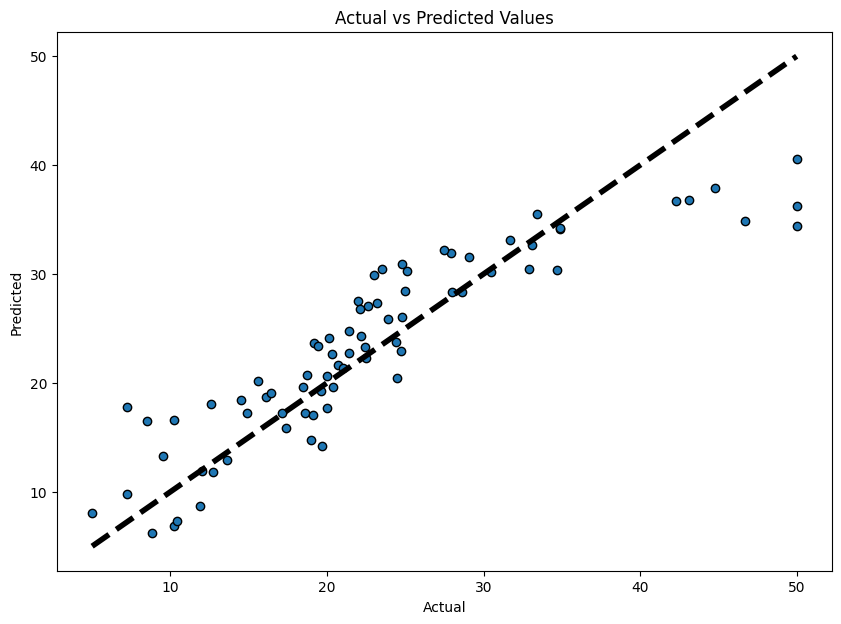

Residuals:  [-5.48227402  9.40178071 -2.46017103  2.39589246  5.58915735]


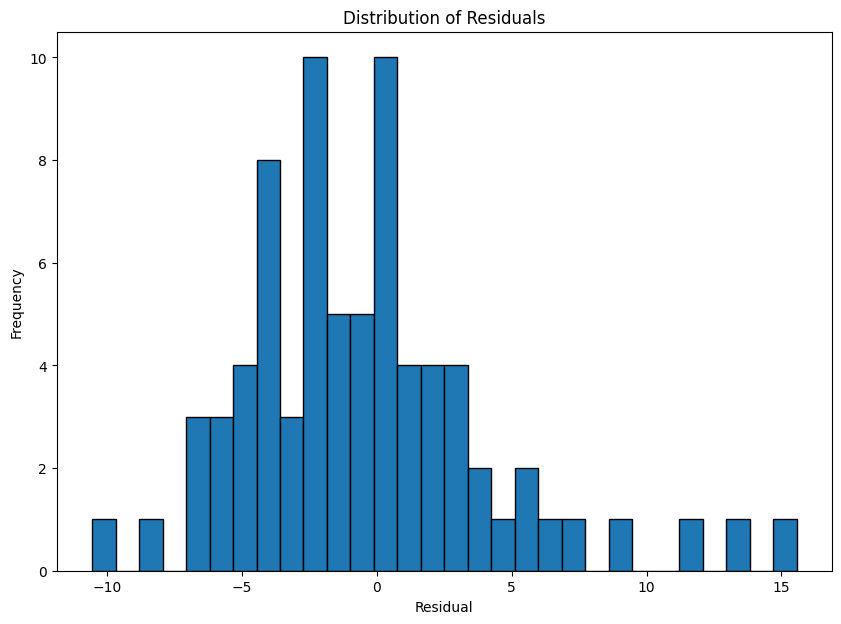

In [15]:
# STEP 13: Perform further analysis for better interpretation of model results
# Visualize predicted vs actual values
predictions = lr_model.transform(test_data)
predictions.select("prediction", "label", "features").show(5)

# Collect the predicted and actual values
predicted_values = np.array(predictions.select("prediction").rdd.flatMap(lambda x: x).collect())
actual_values = np.array(predictions.select("label").rdd.flatMap(lambda x: x).collect())

# Plot predicted vs actual values
plt.figure(figsize=(10, 7))
plt.scatter(actual_values, predicted_values, edgecolors=(0, 0, 0))
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Print a few residuals
residuals = actual_values - predicted_values
print("Residuals: ", residuals[:5])

# Additional analysis: Distribution of residuals
plt.figure(figsize=(10, 7))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()